In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [25]:
m = 100
sbp_diff = []

for i in range(1000):
    dx = da.sample(2 * m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())

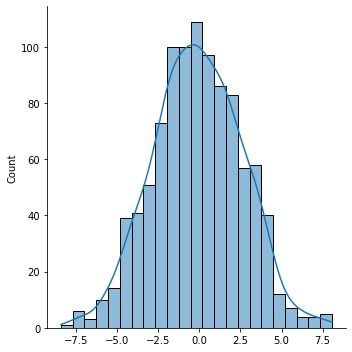

In [26]:
sns.displot(sbp_diff, kde=True)

In [13]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean        0.143257
std         2.741298
min        -9.416473
25%        -1.789819
50%         0.146135
75%         2.070600
max         8.697965
dtype: float64

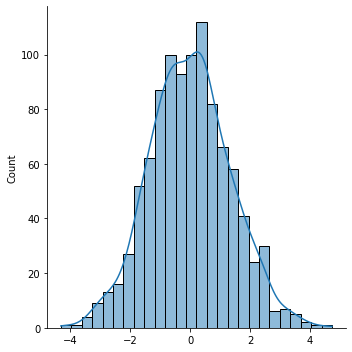

In [32]:
m = 400
sbp_diff = []

for i in range(1000):
    dx = da.sample(2 * m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())

sns.displot(sbp_diff, kde=True)

In [35]:
for m in 100, 400:
    sbp_diff = []
    for i in range(1000):
        dx = da.sample(m * 2)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" %m, np.std(sbp_diff), np.sqrt(2 / m))

m=100 0.12508968297190107 0.1414213562373095
m=400 0.06471570750189175 0.07071067811865475


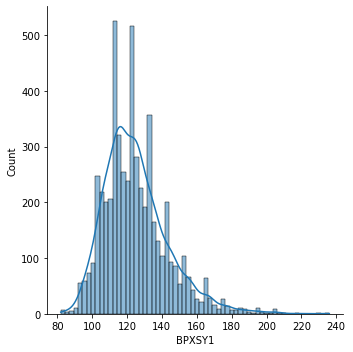

In [37]:
sns.displot(da.BPXSY1.dropna(), kde=True)

/Users/seunghoonyang/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


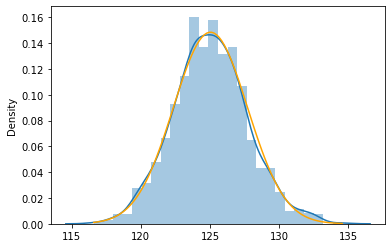

In [41]:
m = 50
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

In [45]:
norm.pdf?

Signature: norm.pdf(x, *args, **kwds)
Docstring:
Probability density function at x of the given RV.

Parameters
----------
x : array_like
    quantiles
arg1, arg2, arg3,... : array_like
    The shape parameter(s) for the distribution (see docstring of the
    instance object for more information)
loc : array_like, optional
    location parameter (default=0)
scale : array_like, optional
    scale parameter (default=1)

Returns
-------
pdf : ndarray
    Probability density function evaluated at x
File:      ~/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py
Type:      method
